In [270]:
import glob
from craco.cardcap import CardcapFile
import numpy as np
from astropy.io import fits
from pylab import *
import glob
import warnings
%matplotlib notebook

In [271]:
!ls -lrth data/testdata-primes-complex-linphase/*.fits
! realpath 

-rw-rw-r-- 1 ban115 ban115 330M May 26 12:19 data/testdata-primes-complex-linphase/test-debughdr-lsb0.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:19 data/testdata-primes-complex-linphase/test-debughdr-lsb1.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb2.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb3.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb4.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb5.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb6.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:20 data/testdata-primes-complex-linphase/test-debughdr-lsb7.fits
-rw-rw-r-- 1 ban115 ban115 330M May 26 12:21 data/testdata-primes-complex-linphase/test-debughdr-lsb8.fits
-rw-rw-r-- 1 ban115 ban115 330M May 2

In [230]:
d = []

for lsb in range(12):
    #fname = f'data/testdata-primes-complex/test-debughdr-lsb{lsb}.fits'
    fname = f'data/testdata-primes-complex-linphase/test-debughdr-lsb{lsb}.fits'
    ccap = CardcapFile(fname)
    pkts  = ccap.load_packets(92160)
    print(fname, pkts.shape)
    d.append(pkts)


data/testdata-primes-complex-linphase/test-debughdr-lsb0.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb1.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb2.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb3.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb4.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb5.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb6.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb7.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb8.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb9.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb10.fits (92160,)
data/testdata-primes-complex-linphase/test-debughdr-lsb11.fits (92160,)


In [231]:
nant = 30
idx = 0
products = []
revproducts = {}
auto_products = []
cross_products = []
for a1 in range(1, nant+1):
    for a2 in range(a1, nant+1):
        products.append((a1,a2))
        revproducts[(a1,a2)] = idx
        if a1 == a2:
            auto_products.append(idx)
        else:
            cross_products.append(idx)
            
        idx += 1
      
        
products = np.array(products, dtype=[('a1',np.int16), ('a2', np.int16)])

In [232]:
darr = np.array(d)

In [233]:
drd = darr['data']
drd.shape

(12, 92160, 1, 465, 2, 2)

In [234]:
dx = drd[:,1,0,:,:,:]
dx.shape

(12, 465, 2, 2)

In [235]:
for lsb in range(12):
    same0 = np.all(drd[lsb,0,...] == drd[lsb, 0:, ...])
    same1 = np.all(drd[lsb,1,...] == drd[lsb, 1:, ...])
    print('Everything should be the same as the 2nd integration?', same1,lsb)
    if not same1:
        warnings.warn(f'Everything should be the saem as the 2nd integration lsb={lsb}')

Everything should be the same as the 2nd integration? True 0
Everything should be the same as the 2nd integration? True 1
Everything should be the same as the 2nd integration? True 2
Everything should be the same as the 2nd integration? True 3
Everything should be the same as the 2nd integration? True 4
Everything should be the same as the 2nd integration? True 5
Everything should be the same as the 2nd integration? True 6
Everything should be the same as the 2nd integration? True 7
Everything should be the same as the 2nd integration? True 8
Everything should be the same as the 2nd integration? True 9
Everything should be the same as the 2nd integration? True 10
Everything should be the same as the 2nd integration? True 11


In [236]:
print('Is all imaginary parts negative?', np.all(dx[...,1] == 1))

Is all imaginary parts negative? False


In [237]:
print('Pol1 == pol2?', np.all(dx[...,0,:] == dx[...,1,:]))

Pol1 == pol2? False


In [238]:
autos = dx[:,auto_products,:,:]
if not np.all(autos[...,1] == 0):
    warnings.warn('Some autos have nonzero imaginary part')



In [239]:
# calcualte primes
import math
import numpy
def prime6(upto=1000000):
    primes=numpy.arange(3,upto+1,2)
    isprime=numpy.ones((upto-1)//2,dtype=bool)
    for factor in primes[:int(math.sqrt(upto))//2]:
        if isprime[(factor-2)//2]: isprime[(factor*3-2)//2::factor]=0
    return numpy.insert(primes[isprime],0,2)

nant = 30
npol = 2
ninput=nant*npol
x = prime6(1000)[:nant*npol] # 60 primes
print(f'Got {len(x)} Primes: {x}')
xpol1 = x[::2]
xpol2 = x[1::2]


Got 60 Primes: [  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281]


In [240]:
xcorr = np.outer(x,x)
xcorr

array([[    4,     6,    10, ...,   542,   554,   562],
       [    6,     9,    15, ...,   813,   831,   843],
       [   10,    15,    25, ...,  1355,  1385,  1405],
       ...,
       [  542,   813,  1355, ..., 73441, 75067, 76151],
       [  554,   831,  1385, ..., 75067, 76729, 77837],
       [  562,   843,  1405, ..., 76151, 77837, 78961]])

In [241]:
xsum = xcorr*9*32
xsum

array([[    1152,     1728,     2880, ...,   156096,   159552,   161856],
       [    1728,     2592,     4320, ...,   234144,   239328,   242784],
       [    2880,     4320,     7200, ...,   390240,   398880,   404640],
       ...,
       [  156096,   234144,   390240, ..., 21151008, 21619296, 21931488],
       [  159552,   239328,   398880, ..., 21619296, 22097952, 22417056],
       [  161856,   242784,   404640, ..., 21931488, 22417056, 22740768]])

In [242]:
dx.shape

(12, 465, 2, 2)

In [243]:
print('1-1 pol1', dx[:,0,0,:])
print('1-1 pol2', dx[:,0,1,:])

1-1 pol1 [[-32128      0]
 [ 16704      0]
 [  8352      0]
 [  4176      0]
 [  2088      0]
 [  1044      0]
 [   522      0]
 [   261      0]
 [   130      0]
 [    65      0]
 [    32      0]
 [    16      0]]
1-1 pol2 [[ -1920      0]
 [ 31808      0]
 [-16864      0]
 [ 24336      0]
 [ 12168      0]
 [  6084      0]
 [  3042      0]
 [  1521      0]
 [   760      0]
 [   380      0]
 [   190      0]
 [    95      0]]


In [244]:
print('1-2 pol1', dx[:,1,0,:])
print('1-2 pol2', dx[:,1,1,:])

1-2 pol1 [[-32128      0]
 [ 16704      0]
 [  8352      0]
 [  4176      0]
 [  2088      0]
 [  1044      0]
 [   522      0]
 [   261      0]
 [   130      0]
 [    65      0]
 [    32      0]
 [    16      0]]
1-2 pol2 [[ -8832  -2880]
 [ 28352  -1440]
 [-18592   -720]
 [ 23472   -360]
 [ 11736   -180]
 [  5868    -90]
 [  2934    -45]
 [  1467    -23]
 [   733    -12]
 [   366     -6]
 [   183     -3]
 [    91     -2]]


In [245]:
np.all(dx[...,1] == 0)

False

In [246]:
dx.shape

(12, 465, 2, 2)

In [247]:
dx[lsb,:4,:,:]//32//9

array([[[ 0,  0],
        [ 0,  0]],

       [[ 0,  0],
        [ 0, -1]],

       [[ 0,  0],
        [ 0, -1]],

       [[ 0,  0],
        [ 0, -1]]], dtype=int16)

In [248]:
dx[:,0,:,:]

array([[[-32128,      0],
        [ -1920,      0]],

       [[ 16704,      0],
        [ 31808,      0]],

       [[  8352,      0],
        [-16864,      0]],

       [[  4176,      0],
        [ 24336,      0]],

       [[  2088,      0],
        [ 12168,      0]],

       [[  1044,      0],
        [  6084,      0]],

       [[   522,      0],
        [  3042,      0]],

       [[   261,      0],
        [  1521,      0]],

       [[   130,      0],
        [   760,      0]],

       [[    65,      0],
        [   380,      0]],

       [[    32,      0],
        [   190,      0]],

       [[    16,      0],
        [    95,      0]]], dtype=int16)

In [249]:
dx[:,1,:,:]

array([[[-32128,      0],
        [ -8832,  -2880]],

       [[ 16704,      0],
        [ 28352,  -1440]],

       [[  8352,      0],
        [-18592,   -720]],

       [[  4176,      0],
        [ 23472,   -360]],

       [[  2088,      0],
        [ 11736,   -180]],

       [[  1044,      0],
        [  5868,    -90]],

       [[   522,      0],
        [  2934,    -45]],

       [[   261,      0],
        [  1467,    -23]],

       [[   130,      0],
        [   733,    -12]],

       [[    65,      0],
        [   366,     -6]],

       [[    32,      0],
        [   183,     -3]],

       [[    16,      0],
        [    91,     -2]]], dtype=int16)

In [250]:
dx.shape

(12, 465, 2, 2)

In [251]:
dxc = np.zeros(dx.shape[:-1], dtype=np.complex)
dxc.real = dx[...,0]
dxc.imag = dx[...,1]
dxc.shape

(12, 465, 2)

<IPython.core.display.Javascript object>


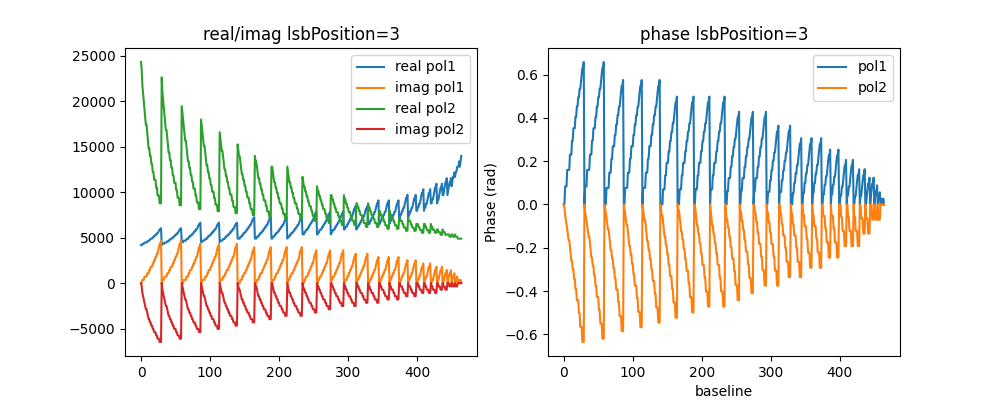

In [269]:
fig, ax = subplots(1,2, sharex=True)
lsb =3

ax[0].plot(dx[lsb,:,0,0], label='real pol1')
ax[0].plot(dx[lsb,:,0,1], label='imag pol1')
ax[0].plot(dx[lsb,:,1,0], label='real pol2')
ax[0].plot(dx[lsb,:,1,1], label='imag pol2')
ax[0].legend()
ax[1].plot(np.angle(dxc[lsb,:,0]), label='pol1')
ax[1].plot(np.angle(dxc[lsb,:,1]), label='pol2')
ax[1].legend()

ax[1].set_ylabel('Phase (rad)')
ax[0].set_title(f'real/imag lsbPosition={lsb}')
ax[1].set_title(f'phase lsbPosition={lsb}')
xlabel('baseline')
fig.set_size_inches(10,4)


<IPython.core.display.Javascript object>


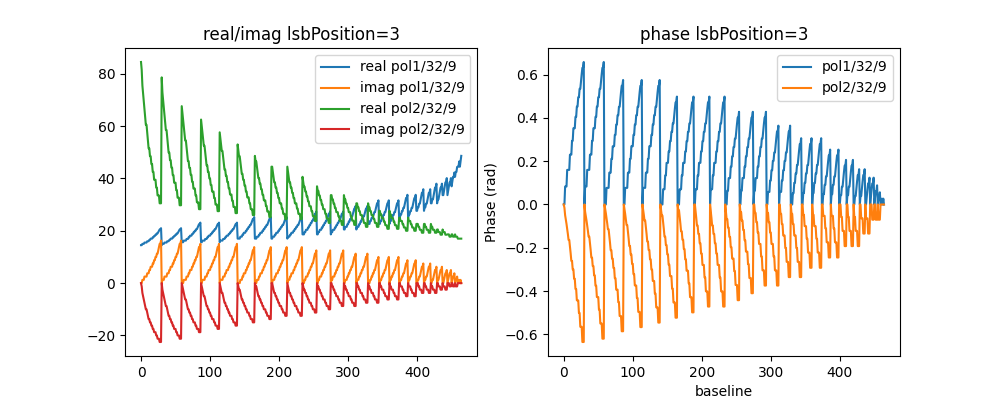

In [268]:

fig, ax = subplots(1,2, sharex=True)
lsb =3

ax[0].plot(dx[lsb,:,0,0]/32/9, label='real pol1/32/9')
ax[0].plot(dx[lsb,:,0,1]/32/9, label='imag pol1/32/9')
ax[0].plot(dx[lsb,:,1,0]/32/9, label='real pol2/32/9')
ax[0].plot(dx[lsb,:,1,1]/32/9, label='imag pol2/32/9')
ax[0].legend()
ax[1].plot(np.angle(dxc[lsb,:,0]/32/9), label='pol1/32/9')
ax[1].plot(np.angle(dxc[lsb,:,1]/32/9), label='pol2/32/9')
ax[1].legend()

ax[1].set_ylabel('Phase (rad)')
ax[0].set_title(f'real/imag lsbPosition={lsb}')
ax[1].set_title(f'phase lsbPosition={lsb}')
xlabel('baseline')
fig.set_size_inches(10,4)
